In [2]:
from scipy.integrate import odeint
from scipy.optimize import fsolve
import numpy as np
from matplotlib import pyplot as plt
import pandas
%matplotlib inline

In [3]:
D69 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Meyer69'))
H97 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'VanHoek97'))
P89 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Postma89'))
P93 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Pijen93'))
S86 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Sonn86'))
B79 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Barford79'))
C98 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Cortassa98'))
R83 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Rieger83'))
K201 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Kock201'))
K202 = np.array(pandas.read_excel('Data.xlsx', sheetname = 'Kock202'))

Glucose  + $O_2$ + $NH_3$ $->$ Ethanol + Biomass + $CO_2$ + $H_2O$

<img src="etresp.png" width="500" />

<center> $$V_1 = (1 + \alpha)V_2 + V_3 + V_4$$</center>
 <center>$$V_4 = V_5 + 1.5V_6$$</center>
<center>$$ \beta + 2V_3 - 1/3V_5 - 2V_7 = 0$$</center>
<center>$$ -\gamma V_2 + 2/3V_3 - 1/3V_4 + V_6 +  2(P/O)V_7 = \Theta$$</center>
<center> $$V_2 = \mu $$</center>

In [44]:

A = np.matrix([[-1,0,1,1,1,0,0],        #Carbon
                [-2,0,1.8,3,0,2,-3],    #Hydrogen
                [-1,-2,0.5,0.5,2,1,0],  #Oxygen
                [0,0,0.2,0,0,0,-1],     #Nitrogen
                [0,0,0,0,1,0,0],        #CO2 Spec
                [0,1,0,0,0,0,0],        #O2 Spec
                [0,0,1,0,0,0,0]])       #Biomass Spec

Xdor = 4 + 1.8 + 0.5*-2 + 0.2*-3
Xmm = 12 + 1.8 + 0.5*16 + 0.2*14

def Analysis(Data,Beta,Gamma,Name):
    span = range(len(Data))
    
    ratp = np.zeros_like(Data[:,0])
    Resp = np.zeros_like(Data[:,0])
    re = np.zeros_like(Data[:,0])
    P_O = np.zeros_like(Data[:,0])
    Rs = np.zeros_like(Data[:,0])
    
    for i in span:
        B = np.matrix([0,0,0,0,Data[i,2],Data[i,3],Data[i,0]/Xmm*1000]).T
        X = np.linalg.solve(A,B)
        re[i] = X[3,0]
        Rs[i] = X[0,0]

        alpha = 0.25*(Xdor + 2*Beta - 4)

        Resp[i] = Data[i,2] - alpha*Data[i,0] - 0.5*X[3,0]
            
        P_O[i] = (0.5/Data[i,3])*(Gamma*Data[i,0]/Xmm*1000 - 0.5*X[3,0] - 2/3*Resp[i])
        
        ratp[i] = 0.5*re[i] + P_O[i]*2*Data[i,3] + (2/3)*Resp[i]
        
    if pltrate == True:
        
        
        plt.plot(Data[:,0],Rs,'go',label = '$r_{S}$')
        plt.plot(Data[:,0],Data[:,2],'ro',label = '$r_{CO_2}$')
        plt.plot(Data[:,0],Data[:,3],'o',label = '$r_{O_2}$ ' + str(Name))
        plt.plot(Data[:,0],re,'ko',label = '$r_{Ethanol}$')

    
    if pltresp == True:
        
        
        plt.plot(Data[:,0],Resp,'o',label = str(Name))
        
        
    
    if pltpo == True:
        
        plt.plot(Data[:,0],P_O,'o',label = str(Name))
#         plt.plot(Data[:,0],Data[:,3],'o',label = '$r_{O_2}$ ' + str(Name))
        
    if pltenergy == True:
        

        plt.plot(Data[:,0],ratp,'co-',label = 'Total energy')
        plt.plot(Data[:,0],Data[:,3]*P_O*2,'ko',label = 'Oxygen energy')
        plt.plot(Data[:,0],0.5*re,'ro',label = 'Ethanol energy')
        plt.plot(Data[:,0],Resp*2/3,'bo',label = 'Respiration energy')
        
    if pltg == True:
        plt.plot(Data[:,0],Rs,'<',label = str(Name))

        
def Plot(Name):
    if pltrate == True:
        
  
        plt.xlabel('D $(1/h)$')
        plt.ylabel('Rate $(mmol_{i}/g/h$) ')
        
        plt.legend(loc = 'best')
        plt.savefig(str(Name) + '_RATE.png')

    
    if pltresp == True:
        
        
        plt.xlabel('D $(1/h)$')
        plt.ylabel('Respiration $(mcmol/g/h$) ')
        plt.legend(loc = 'best')
        plt.savefig(str(Name) + '_RESP.png')
        
    
    if pltpo == True:
        
        plt.xlabel('D $(1/h)$')
        
        plt.ylabel('P/O $(mol_{ATP}/mol_{O_2})$ ')
        
        plt.legend(loc = 'best')
        plt.savefig(str(Name) + '_PO.png')
        
    if pltenergy == True:
        

        plt.xlabel('D $(1/h)$')
        plt.ylabel('Energy source $(mol_{ATP}//g/h)$ ')
        
        plt.legend(loc = 'best')
        plt.savefig(str(Name) + '_Energy.png')
        
    if pltg == True:
        plt.xlabel('D $(1/h)$')
        plt.ylabel('Rate $(mcmol/g/h$) ')
        plt.legend(loc = 'best')
        plt.savefig(str(Name) + '_S.png')
    
#     plt.plot(Data[:,0],P_O,'o-',label = str(Name))


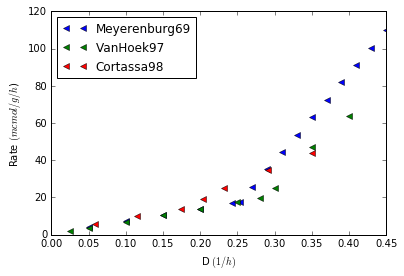

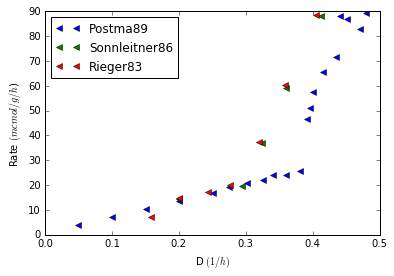

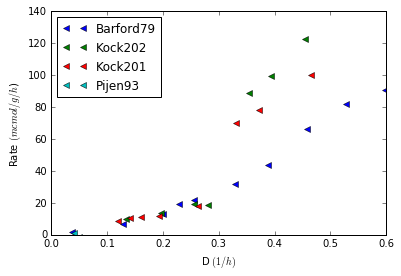

In [45]:
Beta = 0.1
Gamma = 2.5

"""Which plots do you want"""

"Rates of CO2 O2 and Ethanol?"
pltrate = False

"Respiration vs dilution rate?"
pltresp = False

"P/O vs dilution rate?"
pltpo = False

"Energy composition plot"
pltenergy = False

"Glucose consumption"
pltg = True
plt.figure()
# plt.title("Increase in PO")
Name = 'Increase'
Analysis(D69,Beta,Gamma,'Meyerenburg69')
Analysis(H97,Beta,Gamma,'VanHoek97')
Analysis(C98,Beta,Gamma,'Cortassa98')
plt.ylim(0)
Plot(Name)

plt.figure()
# plt.title("Decrease in PO")
Name = 'Decrease'
Analysis(P89,Beta,Gamma,'Postma89')
Analysis(S86,Beta,Gamma,'Sonnleitner86')
Analysis(R83,Beta,Gamma,'Rieger83')
plt.ylim(0)
Plot(Name)

plt.figure()
# plt.title("NO correlation")
Name = 'Non'
Analysis(B79,Beta,Gamma,'Barford79')
Analysis(K202,Beta,Gamma,'Kock202')
Analysis(K201,Beta,Gamma,'Kock201')
Analysis(P93,Beta, Gamma,'Pijen93')
plt.ylim(0)
Plot(Name)

# Analysis(P93,Beta,Gamma,'Pijen93')



# Interpretation

It can be seen from the relationship between the chemostat dilution rate and the specific growth rate that saccharomyces cerevisea always optimises for biomass growth. Therefore setting a dilution rate can be seen as setting the energy production requirement for the cell. The analysis of this data assumes that the energy cost to produce biomass ($\gamma$) is constant and there is no energy required for maintainance. 

The P/O ratio is an indication of the effiency of the oxidative phosphorylation process. It is therefore implied that if the P/O increases the effiency of respiration increases. 

Once the oxygen consumpution is at the max or aerobic fermentation has began it can be seen that the P/O ratio begins to increase. This is to account for the decrease consumption of oxygen as the energy requirement still needs to be met.

It can then be seen that the formation of ethanol does not affect the growth of biomass. Therefore it possible that this system developed as a means of out competing other organisms since it consumes glucose at an increase rate to produce ethanol while still growing at the maximum rate.

In [6]:
Name = 'hello'
print (str(Name) + '.png')

hello.png
